Activity / Task 1
--

Read the rr_temp_rh_24_30May21.csv. The file contains gridded data, the columns describe lat: latitude and lon: longitude for each datapoint, rr: total rainfall, tn weekly-mean daily-minimum temperature, tx: weekly-mean daily-maximum temperature and rh mean relative humidity
<ol>
<li> Generate spatial map for rainfall, maximum and minimum temperature and relative humidity </li>
<li> Save figure to pdf and png </li>
<li> Interpret the figures </li> 
</ol>

#### IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import cartopy 
import numpy
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
from pathlib import Path
import cartopy.io.shapereader as shapereader
import warnings
warnings.filterwarnings('ignore')

#### READING THE DATASET

In [2]:
path = Path('OneQuantum-Ghana-main/data/')

In [3]:
data = pd.read_csv(path/'rr_temp_rh_24_30May21.csv')
data.head(5)

,lat,lon,rr,tx,tn,rh
0,11.163751,-0.280419,4.933419,36.248352,26.283852,48.000679
1,11.113751,-0.380419,7.972096,36.434284,26.415695,47.320473
2,11.113751,-0.280419,4.498419,36.250961,26.290007,47.993015
3,11.113751,-0.230419,2.547681,36.161015,26.229429,48.339138
4,11.113751,-0.180419,1.073479,36.076275,26.172325,48.663425


#### SELECTING THE COLUMNS TO PLOT

In [4]:
lon = data['lon']
lat = data['lat']
rain = data['rr']
tmax = data['tx']
tmin = data['tn']
rh = data['rh']

#### READING THE SHAPE FILE

In [5]:
shape_file = list(shapereader.Reader(str((path/'gh_shp/gh_wgs16dregions.shp'))).geometries())

#### SPATIAL PLOTS

Text(0.5, 1.0, 'Spatial Rainfall Distribution')

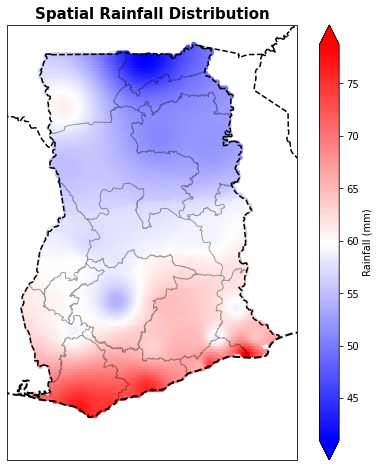

In [6]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-3.5, 1.5, 4,11.5 ], crs = ccrs.PlateCarree() )
ax.add_feature(cf.BORDERS, lw = 1.5, ls = "--", color = 'k')
ax.add_feature(cf.COASTLINE, lw = 2, color = 'black', ls = '--')

# add the administrative borders from the shapefile
ax.add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.2)

#plotting
sp = ax.scatter(lon,lat,20,c=rh, cmap='bwr', alpha = 1)
fig.colorbar(sp,label="Rainfall (mm)", orientation="vertical", extend='both')

ax.set_title('Spatial Rainfall Distribution', fontsize  = 15, fontweight = 'bold')

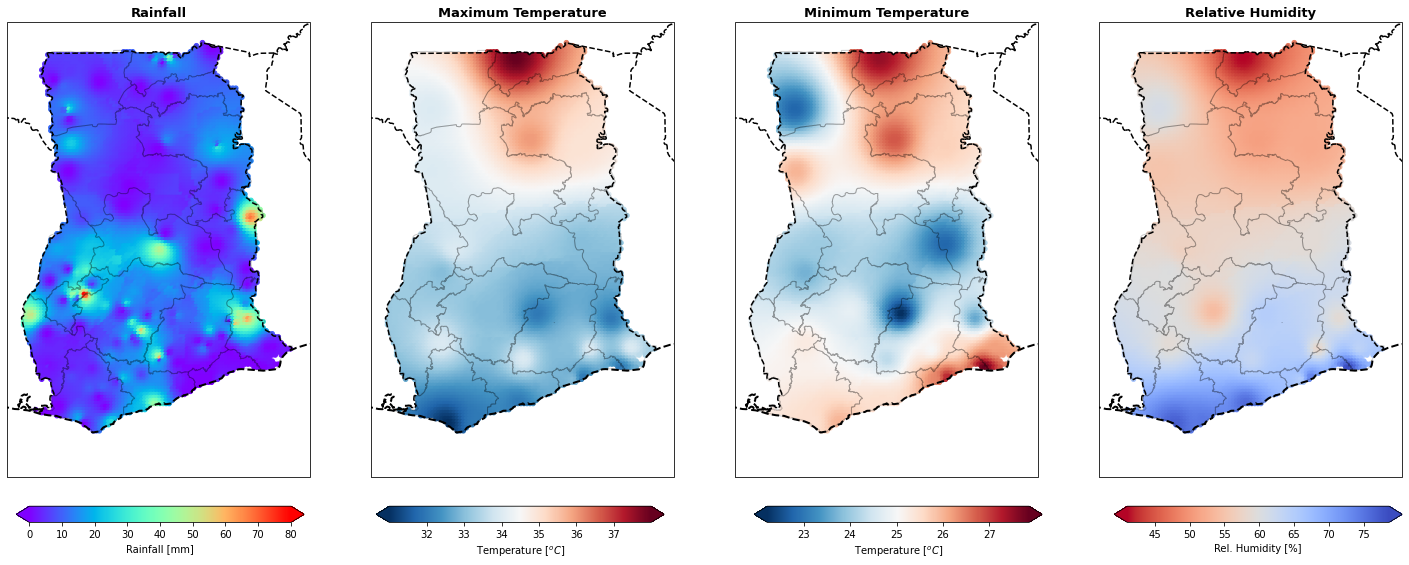

In [7]:
fig, axes = plt.subplots(ncols = 4, nrows = 1, figsize=(25,15),subplot_kw={'projection': ccrs.PlateCarree()})
#plt.subplots_adjust(wspace = 0.3, hspace = 0.2, bottom = 0.5)
labels =['Rainfall [mm]','Temperature [$^o C$]','Temperature [$^o C$]', 'Rel. Humidity [%]']
all_data  = [rain, tmax, tmin, rh]
colors = ['rainbow', 'RdBu_r', 'RdBu_r', 'coolwarm_r']
titles = ['Rainfall', 'Maximum Temperature', 'Minimum Temperature', 'Relative Humidity']
ax = axes.flatten()

for i, a in enumerate(ax):
    ax[i].add_feature(cf.BORDERS, lw = 1.5, ls = "--", color = 'black')
    ax[i].set_extent([-3.5, 1.5, 4,11.5 ], crs = ccrs.PlateCarree() )
    #ax[i].add_feature(cf.BORDERS, lw = 1.5, ls = "--", color = 'black')
    ax[i].add_feature(cf.COASTLINE, lw = 2, color = 'k', ls = '--')
    ax[i].set_title(titles[i], fontsize = 13, fontweight = 'bold')
    
    ax[i].add_geometries(shape_file, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.2)
   
    
    #####
    s= ax[i].scatter(lon, lat, c= all_data[i], s = 20, cmap = colors[i])
    
    rrax = fig.add_axes([0.13, 0.25, 0.16, 0.015])
    mxax = fig.add_axes([0.33, 0.25, 0.16, 0.015])
    mnax = fig.add_axes([0.54, 0.25, 0.16, 0.015])
    rhax = fig.add_axes([0.74, 0.25, 0.16, 0.015])
    
    axx = [rrax,mxax,mnax,rhax]
    fig.colorbar(s, cax = axx[i], orientation = 'horizontal', label = labels[i], extend = 'both')



Task 2
--
Read the file "Tamale_CRU_rainfall.csv" using genfromtxt
<ol>
<li> Create a subplot which contain a bar chart showing the August annual rainfall and a timeseries by compute the annaul rainfall total </li>
<li> Create a bar chart for June rainfall and timeseries of the annual mean rainfall on the same figure. </li>
<li> Save figures to png </li>
    
Note:label all your axes, add titles and legends
</ol>



##### IMPORTING LIBRARIES

In [8]:
import numpy as np
import matplotlib.pyplot as plt

##### READING DATA

In [9]:
data_path = 'OneQuantum-Ghana-main/data/'
data_name  = 'Tamale_CRU_rainfall.csv'
data = np.genfromtxt(data_path + data_name, delimiter = ",")

In [10]:
x = data[1:,0]
y = data[1:,8]
y1 = data[1:,6]

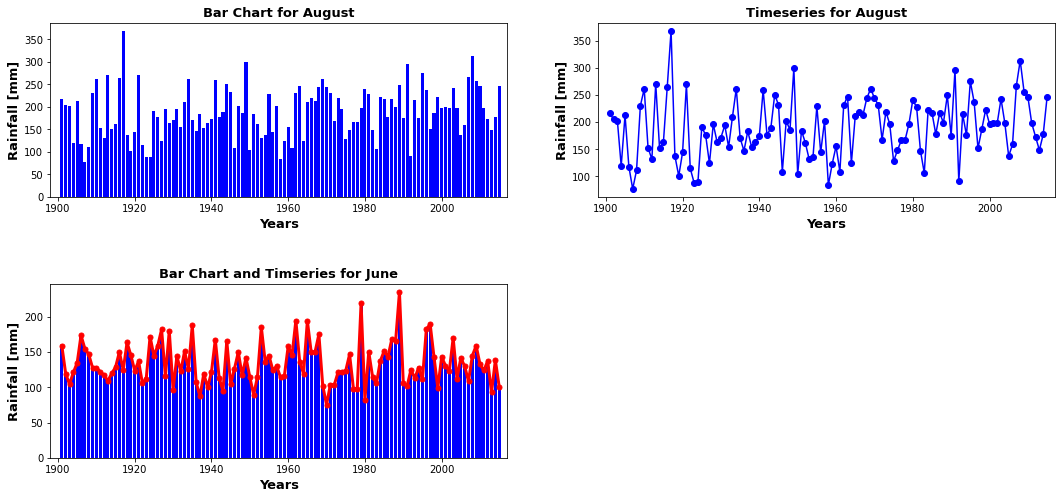

In [11]:
fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (18,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)

# plotting bar chart
axes[0,0].bar(x,y, color = 'blue')

# ploting timseries
axes[0,1].plot(x,y, color = 'blue', lw = 1.5, marker = 'o', markersize = '6')

axes[0,0].set_title('Bar Chart for August', fontweight = 'bold', fontsize = 13)
axes[0,1].set_title('Timeseries for August', fontweight = 'bold', fontsize = 13)


axes[1,0].plot(x, y1, color = 'red', lw = 3, marker = 'o', markersize = '5')
axes[1,0].bar(x,y1, color = 'blue')
axes[1,0].set_title('Bar Chart and Timseries for June', fontweight = 'bold', fontsize = 13)


axes[1,1].remove()

ax = axes.flatten()
for i, a in enumerate(ax):
    ax[i].set_xlim(1898,2017)
    ax[i].set_ylabel("Rainfall [mm]" ,fontweight = 'bold', fontsize = 13)
    ax[i].set_xlabel("Years" ,fontweight = 'bold', fontsize = 13)



Task 3
--

- Read Kumasi, Accra, Kete_krachi and Wa dataset using pandas.
- Rename the columns to suit the column elements
- Create a datetime using the columns containing, year, month and day.
- Find the annual rainfall total of all the datasets and visualise all the stations data in one figure
- Find the annual Rainfall anomalies for each station
- Visualise the yearly rainfall anomalies for each station by creating a subplot of 2 rows and 2 columns (each axis conatinaing visualisation for each station data)
-  Save your graph as pdf

## NB: 
- make sure you label all graphs
- Make use of comments and the markdown to make your script look presentable


In [12]:
import pandas as pd

##### READING DATASETS

In [13]:
data_path = 'E:/DATASETS/GAUGE/'
ksi = pd.read_fwf(data_path + 'Kumasi_1983_2017_dRR_gapless.txt', delimiter = ' ', names = ['Year','Month', "Day", 'Rainfall'])
accra = pd.read_fwf(data_path + 'Accra_1983_2017_dRR_gapless.txt', delimiter = ' ', names = ['Year','Month', "Day", 'Rainfall'])
wa = pd.read_fwf(data_path + 'Wa_1983_2017_dRR_gapless.txt', delimiter = ' ', names = ['Year','Month', "Day", 'Rainfall'])
kk = pd.read_fwf(data_path + 'Kete_Krachi_1983_2017_dRR_gapless.txt', delimiter = ' ', names = ['Year','Month', "Day", 'Rainfall'])

##### CREATING A FUNCTION TO CREATE DATETIME FOR ALL THE DATASETS

In [14]:
def converter(data):
    data['Date'] = pd.to_datetime(data[    ['Year', 'Month', 'Day']])
    
    data.index = data.Date
    data = data.resample('Y').sum()
    
    ####dropping columns i won't use
    data = data.drop(['Year','Month','Day'], axis = 1)
    
    return data

##### APPLYING THE FUNCTION ON THE DATASETS

In [15]:
Wa = converter(wa)
Kk = converter(kk)
Ksi = converter(ksi)
Accra = converter(accra)

In [16]:
%matplotlib inline

##### CREATING FUNCTION TO CALCULATE THE ANOMALIES

In [17]:
def anomaly(data):
    #mean = np.nanmean(data)
    mean = data.mean()
    
    anomaly = data - data.mean()
    
    return anomaly

##### APPLYING THE FUNCTION

In [18]:
Wa_anom = anomaly(Wa)
Kk_anom = anomaly(Kk)
Ksi_anom = anomaly(Ksi)
Accra_anom = anomaly(Accra)

##### LISTING THE DATASETS TO PLOT

In [19]:
anom_data = [Wa_anom, Kk_anom, Ksi_anom, Accra_anom]
ann_data = [Wa, Kk, Ksi, Accra]

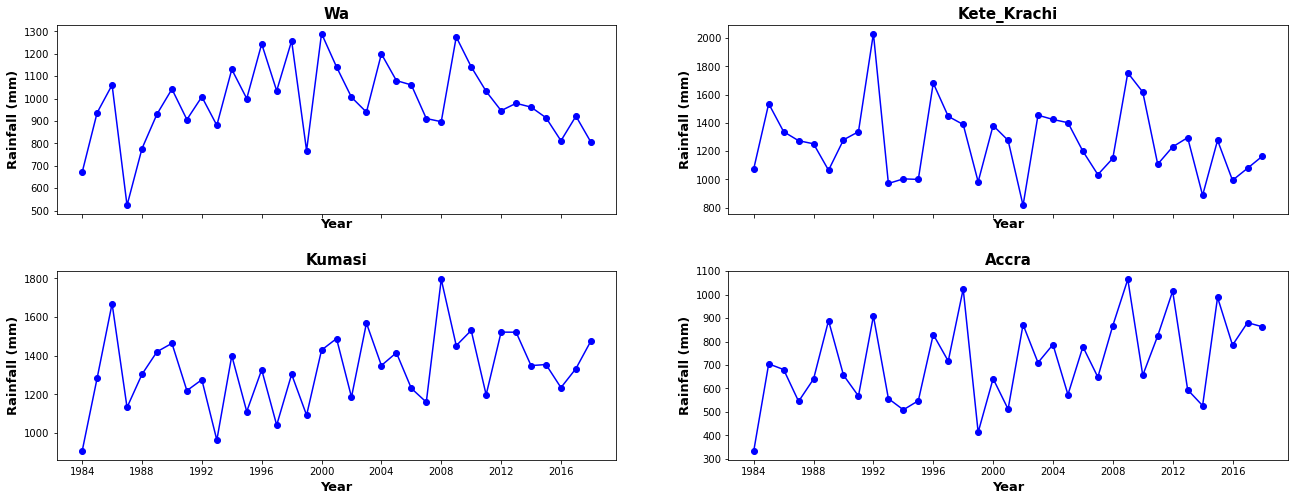

In [20]:
fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (20,8), sharex = True, sharey = False)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2, right = 0.98)

titles = ['Wa', 'Kete_Krachi', 'Kumasi', 'Accra']

ax = axes.flatten()
for i, a in enumerate(ax):
    #ax[i].plot(ann_data[i], color = 'blue', marker = 'o')
    ax[i].plot(ann_data[i], color = 'blue', marker = 'o')
    ax[i].set_title(titles[i], fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('Rainfall (mm)', fontsize = 13, fontweight = 'bold')
    ax[i].set_xlabel('Year',  fontsize = 13, fontweight = 'bold')
    

##### FUNCTION TO SET DIFFERENT COLORS FOR POSITIVE AND NEGATIVE ANOMALIES

In [21]:
def bar_color(data, c1, c2):
    return np.where(data >= 0,c1,c2)

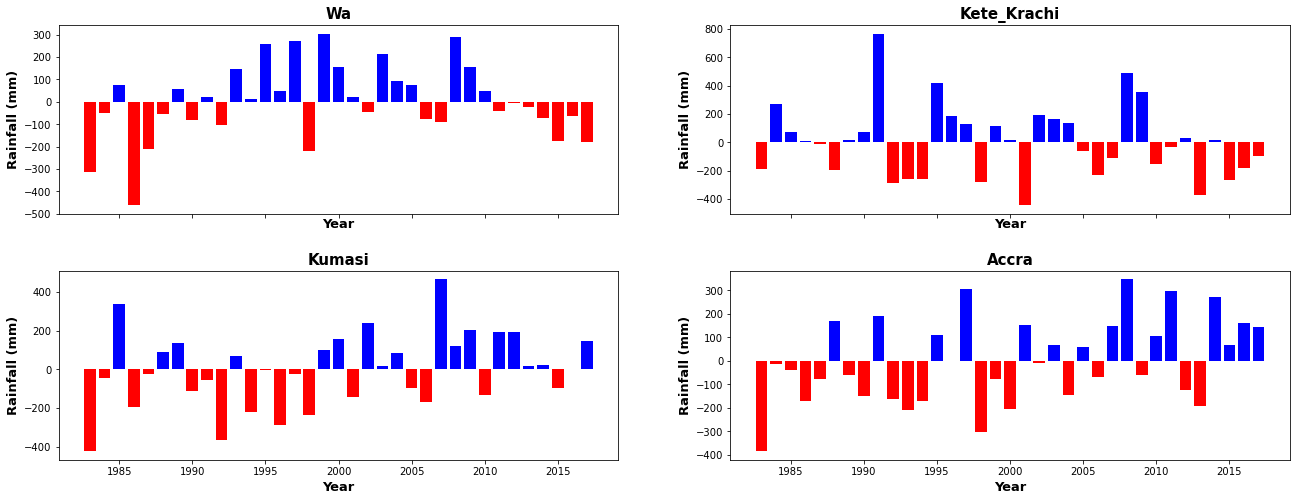

In [22]:
fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (20,8), sharex = True, sharey = False)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2, right = 0.98)

titles = ['Wa', 'Kete_Krachi', 'Kumasi', 'Accra']

ax = axes.flatten()
for i, a in enumerate(ax):
    #anom_data = [Wa_anom, Kk_anom, Ksi_anom, Accra_anom]
    Years = np.arange(1983, 2018,1)
    anom_data = [Wa_anom.Rainfall, Kk_anom.Rainfall, Ksi_anom.Rainfall, Accra_anom.Rainfall]
    
    ax[i].bar(Years, anom_data[i], color = bar_color(anom_data[i], 'blue', 'red'))
    
    ax[i].set_title(titles[i], fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('Rainfall (mm)', fontsize = 13, fontweight = 'bold')
    ax[i].set_xlabel('Year',  fontsize = 13, fontweight = 'bold')
   